In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

In [46]:
scd = np.loadtxt('CWW_Scd_ext.txt')
sbc = np.loadtxt('CWW_Sbc_ext.txt')
im = np.loadtxt('CWW_Im_ext.txt')
m31 = np.loadtxt('CWW_E_ext.txt')

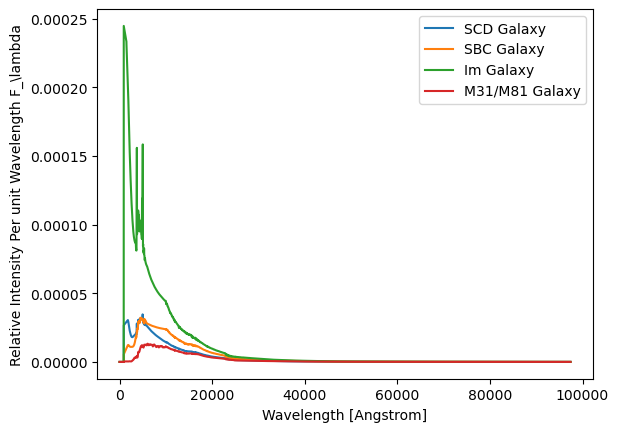

In [47]:
plt.plot(scd[:,0], scd[:,1], label='SCD Galaxy')
plt.plot(sbc[:,0], sbc[:,1], label='SBC Galaxy')
plt.plot(im[:,0], im[:,1], label='Im Galaxy')
plt.plot(m31[:,0], m31[:,1], label='M31/M81 Galaxy')
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel(f'Relative Intensity Per unit Wavelength F_\lambda')
plt.legend()

In [48]:
up = np.loadtxt('up.txt')
gp = np.loadtxt('gp.txt')
rp = np.loadtxt('rp.txt')
ip = np.loadtxt('ip.txt')
zp = np.loadtxt('zp.txt')

In [50]:
scd

array([[1.00000e+01, 0.00000e+00],
       [9.00000e+02, 0.00000e+00],
       [9.10000e+02, 2.67027e-05],
       ...,
       [9.66000e+04, 1.24230e-08],
       [9.70000e+04, 1.22288e-08],
       [9.74000e+04, 1.20201e-08]])

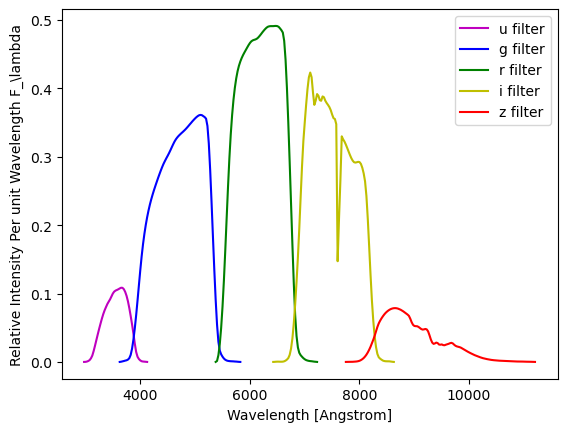

In [51]:
plt.plot(up[:,0], up[:,1], color='m', label='u filter')
plt.plot(gp[:,0], gp[:,1], color='b', label='g filter')
plt.plot(rp[:,0], rp[:,1], color='g', label='r filter')
plt.plot(ip[:,0], ip[:,1], color='y', label='i filter')
plt.plot(zp[:,0], zp[:,1], color='r', label='z filter')
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel(f'Relative Intensity Per unit Wavelength F_\lambda')
plt.legend()

In [52]:
def trap_int(x, y):
    """
    Compute the numerical integration using the trapezoidal rule.

    Parameters:
    x (list or numpy array): x values (in this case, wavelengths)
    y (list or numpy array): y values (in this case, transmission function values)

    Returns:
    float: Integral value
    """
    integral = np.trapz(y, x)
    return integral


def eff_lambda(lam, Tval):
    
    # Calculate the product of the wavelength and the transmission function
    lam_Tval = lam * Tval

    # Calculate the integrals of the transmission function and the product of the wavelength and the transmission function
    int_T = trap_int(lam, Tval)
    int_lam_Tval = trap_int(lam, lam_Tval)

    # Calculate the effective wavelength
    eff_lambda = int_lam_Tval / int_T
    return eff_lambda




# Compute the effective wavelength
u_eff = eff_lambda(up[:,0], up[:,1])
g_eff = eff_lambda(gp[:,0], gp[:,1])
r_eff = eff_lambda(rp[:,0], rp[:,1])
i_eff = eff_lambda(ip[:,0], ip[:,1])
z_eff = eff_lambda(zp[:,0], zp[:,1])

u_eff, g_eff, r_eff, i_eff, z_eff, 


(3561.7887341781325,
 4718.872246310886,
 6185.194476976835,
 7499.70417488596,
 8961.488336670101)

In [53]:
import numpy as np
from astropy.modeling import models
from astropy import units as u
from astropy import constants as const

def interpolate_flux_density(wavelengths_sed, flux_density_sed, wavelengths_filter):
    flux_density_interpolated = np.interp(wavelengths_filter, wavelengths_sed, flux_density_sed)
    return flux_density_interpolated



# Interpolate the flux density array to match the wavelength array of the transmission functions
flux_density_u1 = interpolate_flux_density(scd[:,0], scd[:,1], up[:,0])
flux_density_g1 = interpolate_flux_density(scd[:,0], scd[:,1], gp[:,0])
flux_density_r1 = interpolate_flux_density(scd[:,0], scd[:,1], rp[:,0])
flux_density_i1 = interpolate_flux_density(scd[:,0], scd[:,1], ip[:,0])
flux_density_z1 = interpolate_flux_density(scd[:,0], scd[:,1], zp[:,0])

flux_density_u2 = interpolate_flux_density(sbc[:,0], sbc[:,1], up[:,0])
flux_density_g2 = interpolate_flux_density(sbc[:,0], sbc[:,1], gp[:,0])
flux_density_r2 = interpolate_flux_density(sbc[:,0], sbc[:,1], rp[:,0])
flux_density_i2 = interpolate_flux_density(sbc[:,0], sbc[:,1], ip[:,0])
flux_density_z2 = interpolate_flux_density(sbc[:,0], sbc[:,1], zp[:,0])

flux_density_u3 = interpolate_flux_density(im[:,0], im[:,1], up[:,0])
flux_density_g3 = interpolate_flux_density(im[:,0], im[:,1], gp[:,0])
flux_density_r3 = interpolate_flux_density(im[:,0], im[:,1], rp[:,0])
flux_density_i3 = interpolate_flux_density(im[:,0], im[:,1], ip[:,0])
flux_density_z3 = interpolate_flux_density(im[:,0], im[:,1], zp[:,0])

flux_density_u4 = interpolate_flux_density(m31[:,0], m31[:,1], up[:,0])
flux_density_g4 = interpolate_flux_density(m31[:,0], m31[:,1], gp[:,0])
flux_density_r4 = interpolate_flux_density(m31[:,0], m31[:,1], rp[:,0])
flux_density_i4 = interpolate_flux_density(m31[:,0], m31[:,1], ip[:,0])
flux_density_z4 = interpolate_flux_density(m31[:,0], m31[:,1], zp[:,0])

def compute_magnitude(wavelengths, flux_density, transmission):
    flux_through_filter = np.trapz(flux_density * transmission, wavelengths)
    flux_density_normalized = flux_through_filter / np.trapz(transmission, wavelengths)
    magnitude = -2.5 * np.log10(flux_density_normalized) - 48.6
    return magnitude

# Compute magnitudes for each filter using the interpolated flux densities
mag_u1 = compute_magnitude(up[:,0], flux_density_u1, up[:,1])
mag_g1 = compute_magnitude(gp[:,0], flux_density_g1, gp[:,1])
mag_r1 = compute_magnitude(rp[:,0], flux_density_r1, rp[:,1])
mag_i1 = compute_magnitude(ip[:,0], flux_density_i1, ip[:,1])
mag_z1 = compute_magnitude(zp[:,0], flux_density_z1, zp[:,1])

mag_u2 = compute_magnitude(up[:,0], flux_density_u2, up[:,1])
mag_g2 = compute_magnitude(gp[:,0], flux_density_g2, gp[:,1])
mag_r2 = compute_magnitude(rp[:,0], flux_density_r2, rp[:,1])
mag_i2 = compute_magnitude(ip[:,0], flux_density_i2, ip[:,1])
mag_z2 = compute_magnitude(zp[:,0], flux_density_z2, zp[:,1])

mag_u3 = compute_magnitude(up[:,0], flux_density_u3, up[:,1])
mag_g3 = compute_magnitude(gp[:,0], flux_density_g3, gp[:,1])
mag_r3 = compute_magnitude(rp[:,0], flux_density_r3, rp[:,1])
mag_i3 = compute_magnitude(ip[:,0], flux_density_i3, ip[:,1])
mag_z3 = compute_magnitude(zp[:,0], flux_density_z3, zp[:,1])

mag_u4 = compute_magnitude(up[:,0], flux_density_u4, up[:,1])
mag_g4 = compute_magnitude(gp[:,0], flux_density_g4, gp[:,1])
mag_r4 = compute_magnitude(rp[:,0], flux_density_r4, rp[:,1])
mag_i4 = compute_magnitude(ip[:,0], flux_density_i4, ip[:,1])
mag_z4 = compute_magnitude(zp[:,0], flux_density_z4, zp[:,1])



# Compute galaxy colors
u_g1 = mag_u1 - mag_g1
g_r1 = mag_g1 - mag_r1
r_i1 = mag_r1 - mag_i1
i_z1 = mag_i1 - mag_z1

u_g2 = mag_u2 - mag_g2
g_r2 = mag_g2 - mag_r2
r_i2 = mag_r2 - mag_i2
i_z2 = mag_i2 - mag_z2

u_g3 = mag_u3 - mag_g3
g_r3 = mag_g3 - mag_r3
r_i3 = mag_r3 - mag_i3
i_z3 = mag_i3 - mag_z3

u_g4 = mag_u4 - mag_g4
g_r4 = mag_g4 - mag_r4
r_i4 = mag_r4 - mag_i4
i_z4 = mag_i4 - mag_z4

print("u'-g' for SCD:", u_g1)
print("g'-r' for SCD:", g_r1)
print("r'-i' for SCD:", r_i1)
print("i'-z' for SCD:", i_z1)
print("\n")

print("u'-g' for SBC:", u_g2)
print("g'-r' for SBC:", g_r2)
print("r'-i' for SBC:", r_i2)
print("i'-z' for SBC:", i_z2)
print("\n")

print("u'-g' for Im:", u_g3)
print("g'-r' for Im:", g_r3)
print("r'-i' for Im:", r_i3)
print("i'-z' for Im:", i_z3)
print("\n")

print("u'-g' for M31/M81:", u_g4)
print("g'-r' for M31/M81:", g_r4)
print("r'-i' for M31/M81:", r_i4)
print("i'-z' for M31/M81:", i_z4)
print()

u'-g' for SCD: 0.3589810771833868
g'-r' for SCD: -0.21349385130845633
r'-i' for SCD: -0.21570549298326114
i'-z' for SCD: -0.22413468024542738


u'-g' for SBC: 0.5344547492907523
g'-r' for SBC: -0.0900781958157566
r'-i' for SBC: -0.08138300101332163
i'-z' for SBC: -0.05821932840744637


u'-g' for Im: 0.03958793412823525
g'-r' for Im: -0.4181199778067324
r'-i' for Im: -0.20329508846650413
i'-z' for Im: -0.1597770702118808


u'-g' for M31/M81: 1.1801938852741856
g'-r' for M31/M81: 0.22245370136174358
r'-i' for M31/M81: -0.06259634398114144
i'-z' for M31/M81: -0.07061853379867244



In [63]:
def interpolate_flux_density(wavelengths_sed, flux_density_sed, wavelengths_filter):
    flux_density_interpolated = np.interp(wavelengths_filter, wavelengths_sed, flux_density_sed)
    return flux_density_interpolated

def compute_magnitude(wavelengths, flux_density, transmission):
    flux_through_filter = np.trapz(flux_density * transmission, wavelengths)
    flux_density_normalized = flux_through_filter / np.trapz(transmission, wavelengths)
    magnitude = -2.5 * np.log10(flux_density_normalized) - 48.6 + 48.6
    return magnitude


u_g1 = np.array([])
g_r1 = np.array([])
r_i1 = np.array([])
i_z1 = np.array([])

u_g2 = np.array([])
g_r2 = np.array([])
r_i2 = np.array([])
i_z2 = np.array([])

u_g3 = np.array([])
g_r3 = np.array([])
r_i3 = np.array([])
i_z3 = np.array([])

u_g4 = np.array([])
g_r4 = np.array([])
r_i4 = np.array([])
i_z4 = np.array([])

for z in np.arange(0, 1.55, 0.05):
    
    scd = np.loadtxt('CWW_Scd_ext.txt')
    sbc = np.loadtxt('CWW_Sbc_ext.txt')
    im = np.loadtxt('CWW_Im_ext.txt')
    m31 = np.loadtxt('CWW_E_ext.txt')
    
    
    scd[:,0] = scd[:,0]*(1+z)
    sbc[:,0] = sbc[:,0]*(1+z)
    im[:,0] = im[:,0]*(1+z)
    m31[:,0] = m31[:,0]*(1+z)
    
    scd[:,1] = scd[:,1]/(1+z)
    sbc[:,1] = sbc[:,1]/(1+z)
    im[:,1] = im[:,1]/(1+z)
    m31[:,1] = m31[:,1]/(1+z)
    
    





    # Interpolate the flux density array to match the wavelength array of the transmission functions

    flux_density_u1 = interpolate_flux_density(scd[:,0], scd[:,1], up[:,0])
    flux_density_g1 = interpolate_flux_density(scd[:,0], scd[:,1], gp[:,0])
    flux_density_r1 = interpolate_flux_density(scd[:,0], scd[:,1], rp[:,0])
    flux_density_i1 = interpolate_flux_density(scd[:,0], scd[:,1], ip[:,0])
    flux_density_z1 = interpolate_flux_density(scd[:,0], scd[:,1], zp[:,0])

    flux_density_u2 = interpolate_flux_density(sbc[:,0], sbc[:,1], up[:,0])
    flux_density_g2 = interpolate_flux_density(sbc[:,0], sbc[:,1], gp[:,0])
    flux_density_r2 = interpolate_flux_density(sbc[:,0], sbc[:,1], rp[:,0])
    flux_density_i2 = interpolate_flux_density(sbc[:,0], sbc[:,1], ip[:,0])
    flux_density_z2 = interpolate_flux_density(sbc[:,0], sbc[:,1], zp[:,0])

    flux_density_u3 = interpolate_flux_density(im[:,0], im[:,1], up[:,0])
    flux_density_g3 = interpolate_flux_density(im[:,0], im[:,1], gp[:,0])
    flux_density_r3 = interpolate_flux_density(im[:,0], im[:,1], rp[:,0])
    flux_density_i3 = interpolate_flux_density(im[:,0], im[:,1], ip[:,0])
    flux_density_z3 = interpolate_flux_density(im[:,0], im[:,1], zp[:,0])

    flux_density_u4 = interpolate_flux_density(m31[:,0], m31[:,1], up[:,0])
    flux_density_g4 = interpolate_flux_density(m31[:,0], m31[:,1], gp[:,0])
    flux_density_r4 = interpolate_flux_density(m31[:,0], m31[:,1], rp[:,0])
    flux_density_i4 = interpolate_flux_density(m31[:,0], m31[:,1], ip[:,0])
    flux_density_z4 = interpolate_flux_density(m31[:,0], m31[:,1], zp[:,0])



    # Compute magnitudes for each filter using the interpolated flux densities
    mag_u1 = compute_magnitude(up[:,0], flux_density_u1, up[:,1])
    mag_g1 = compute_magnitude(gp[:,0], flux_density_g1, gp[:,1])
    mag_r1 = compute_magnitude(rp[:,0], flux_density_r1, rp[:,1])
    mag_i1 = compute_magnitude(ip[:,0], flux_density_i1, ip[:,1])
    mag_z1 = compute_magnitude(zp[:,0], flux_density_z1, zp[:,1])

    mag_u2 = compute_magnitude(up[:,0], flux_density_u2, up[:,1])
    mag_g2 = compute_magnitude(gp[:,0], flux_density_g2, gp[:,1])
    mag_r2 = compute_magnitude(rp[:,0], flux_density_r2, rp[:,1])
    mag_i2 = compute_magnitude(ip[:,0], flux_density_i2, ip[:,1])
    mag_z2 = compute_magnitude(zp[:,0], flux_density_z2, zp[:,1])

    mag_u3 = compute_magnitude(up[:,0], flux_density_u3, up[:,1])
    mag_g3 = compute_magnitude(gp[:,0], flux_density_g3, gp[:,1])
    mag_r3 = compute_magnitude(rp[:,0], flux_density_r3, rp[:,1])
    mag_i3 = compute_magnitude(ip[:,0], flux_density_i3, ip[:,1])
    mag_z3 = compute_magnitude(zp[:,0], flux_density_z3, zp[:,1])

    mag_u4 = compute_magnitude(up[:,0], flux_density_u4, up[:,1])
    mag_g4 = compute_magnitude(gp[:,0], flux_density_g4, gp[:,1])
    mag_r4 = compute_magnitude(rp[:,0], flux_density_r4, rp[:,1])
    mag_i4 = compute_magnitude(ip[:,0], flux_density_i4, ip[:,1])
    mag_z4 = compute_magnitude(zp[:,0], flux_density_z4, zp[:,1])
    
    u_g1 = np.append([mag_u1 - mag_g1], u_g1)
    g_r1 = np.append([mag_g1 - mag_r1], g_r1)
    r_i1 = np.append([mag_r1 - mag_i1], r_i1)
    i_z1 = np.append([mag_i1 - mag_z1], g_r1)
    
    u_g2 = np.append([mag_u2 - mag_g2], u_g2)
    g_r2 = np.append([mag_g2 - mag_r2], g_r2)
    r_i2 = np.append([mag_r2 - mag_i2], r_i2)
    i_z2 = np.append([mag_i2 - mag_z2], g_r2)
    
    u_g3 = np.append([mag_u3 - mag_g3], u_g3)
    g_r3 = np.append([mag_g3 - mag_r3], g_r3)
    r_i3 = np.append([mag_r3 - mag_i3], r_i3)
    i_z3 = np.append([mag_i3 - mag_z3], g_r3)

    u_g4 = np.append([mag_u4 - mag_g4], u_g4)
    g_r4 = np.append([mag_g4 - mag_r4], g_r4)
    r_i4 = np.append([mag_r4 - mag_i4], r_i4)
    i_z4 = np.append([mag_i4 - mag_z4], g_r4)

    
    
    
    
    
    
    
    
    
    
    
    
#     # Compute galaxy colors
#     u_g1 = mag_u1 - mag_g1
#     g_r1 = mag_g1 - mag_r1
#     r_i1 = mag_r1 - mag_i1
#     i_z1 = mag_i1 - mag_z1

#     u_g2 = mag_u2 - mag_g2
#     g_r2 = mag_g2 - mag_r2
#     r_i2 = mag_r2 - mag_i2
#     i_z2 = mag_i2 - mag_z2

#     u_g3 = mag_u3 - mag_g3
#     g_r3 = mag_g3 - mag_r3
#     r_i3 = mag_r3 - mag_i3
#     i_z3 = mag_i3 - mag_z3

#     u_g4 = mag_u4 - mag_g4
#     g_r4 = mag_g4 - mag_r4
#     r_i4 = mag_r4 - mag_i4
#     i_z4 = mag_i4 - mag_z4

#     print('For redshift ', z)
#     print('\n')

print("u'-g' for SCD:", u_g1)
print("g'-r' for SCD:", g_r1)
print("r'-i' for SCD:", r_i1)
print("i'-z' for SCD:", i_z1)
#print("\n")

print("u'-g' for SBC:", u_g2)
print("g'-r' for SBC:", g_r2)
print("r'-i' for SBC:", r_i2)
print("i'-z' for SBC:", i_z2)
#print("\n")

print("u'-g' for Im:", u_g3)
print("g'-r' for Im:", g_r3)
print("r'-i' for Im:", r_i3)
print("i'-z' for Im:", i_z3)
#print("\n")

print("u'-g' for M31/M81:", u_g4)
print("g'-r' for M31/M81:", g_r4)
print("r'-i' for M31/M81:", r_i4)
print("i'-z' for M31/M81:", i_z4)
print()

u'-g' for SCD: [-0.02370668 -0.04882472 -0.07743097 -0.10926238 -0.14429096 -0.18237781
 -0.22328049 -0.26605725 -0.30842582 -0.3473952  -0.38003262 -0.40322213
 -0.41422267 -0.41110253 -0.3929276  -0.36047149 -0.31588323 -0.26208356
 -0.20212142 -0.13737715 -0.07063874 -0.00360406  0.08808353  0.17416085
  0.26112247  0.33214325  0.38190136  0.42461388  0.44889477  0.45111337
  0.35898108]
g'-r' for SCD: [-0.40146351 -0.40279308 -0.3973318  -0.38465981 -0.36430922 -0.33611423
 -0.30026108 -0.2578052  -0.21054777 -0.16090967 -0.11052961 -0.06061922
 -0.01356922  0.02676684  0.08865147  0.15359372  0.21854943  0.29072488
  0.35558805  0.40656716  0.44378991  0.46190019  0.43433739  0.39018235
  0.31144689  0.21339457  0.11517808  0.00942681 -0.09209321 -0.17019398
 -0.21349385]
r'-i' for SCD: [-0.04695965 -0.01439127  0.01613277  0.0436956   0.06666503  0.08194426
  0.11000387  0.14618346  0.18092299  0.2141291   0.26805842  0.31291583
  0.35879524  0.38966493  0.38431682  0.36636494  0

In [66]:
data = np.array([u_g1, g_r1, r_i1, i_z1, u_g2, g_r2, r_i2, i_z2, u_g3, g_r3, r_i4, i_z3, u_g4, g_r4, r_i4, i_z4,])

/var/folders/lf/9x6vtpzd5_q56g1t2w1y2ghm0000gn/T/ipykernel_79797/2349556655.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([u_g1, g_r1, r_i1, i_z1, u_g2, g_r2, r_i2, i_z2, u_g3, g_r3, r_i4, i_z3, u_g4, g_r4, r_i4, i_z4,])


In [75]:
def create_ascii_table(header, arrays, filename_prefix):
    # Group the arrays into subgroups of 4
    grouped_arrays = [arrays[i:(i+3)] for i in range(0, 16, 4)]

    for idx, data in enumerate(grouped_arrays):
        col_widths = [max(len(str(max(column, key=lambda x: len(str(x))))), len(header[i])) for i, column in enumerate(zip(*data))]
        horizontal_line = "+".join(["-" * (width + 2) for width in col_widths]) + "+"
        header_row = "| " + " | ".join([f"{header[i]:<{col_widths[i-2]}}" for i in range(len(header))]) + " |"
        data_rows = []
        for row in data:
            data_rows.append("| " + " | ".join([f"{row[i]:<{col_widths[i]}}" for i in range(len(row))]) + " |")

        with open(f"{filename_prefix}_{idx+1}.txt", "w") as file:
            file.write(horizontal_line + "\n")
            file.write(header_row + "\n")
            file.write(horizontal_line + "\n")
            for row in data_rows:
                file.write(row + "\n")
                file.write(horizontal_line + "\n")

# Replace with your own arrays


# Create header with redshifts
redshifts = np.arange(0, 1.55, 0.05)
header = ["color"] + [f"z={redshift:.2f}" for redshift in redshifts]

# Create ASCII tables
create_ascii_table(header, data, "ascii_table")

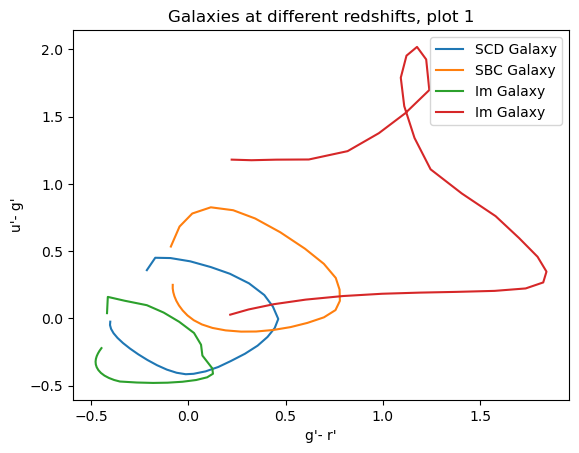

In [98]:
plt.plot(g_r1, u_g1, label='SCD Galaxy')
plt.plot(g_r2, u_g2, label='SBC Galaxy')
plt.plot(g_r3, u_g3, label='Im Galaxy')
plt.plot(g_r4, u_g4, label='Im Galaxy')
plt.ylabel("u'- g'")
plt.xlabel("g'- r'")
plt.title('Galaxies at different redshifts, plot 1')
plt.legend()

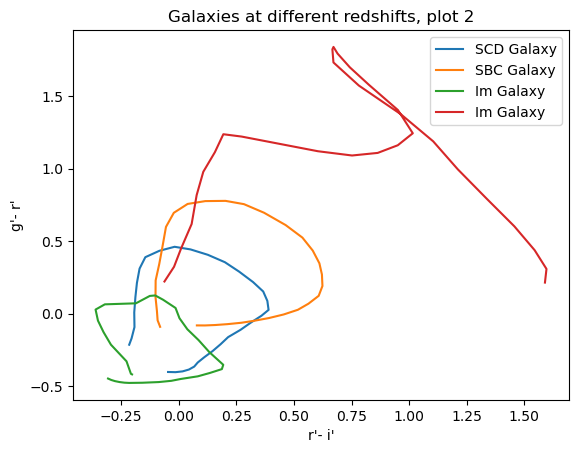

In [97]:
plt.plot(r_i1, g_r1, label='SCD Galaxy')
plt.plot(r_i2, g_r2, label='SBC Galaxy')
plt.plot(r_i3, g_r3, label='Im Galaxy')
plt.plot(r_i4, g_r4, label='Im Galaxy')
plt.xlabel("r'- i'")
plt.ylabel("g'- r'")
plt.title('Galaxies at different redshifts, plot 2')
plt.legend()

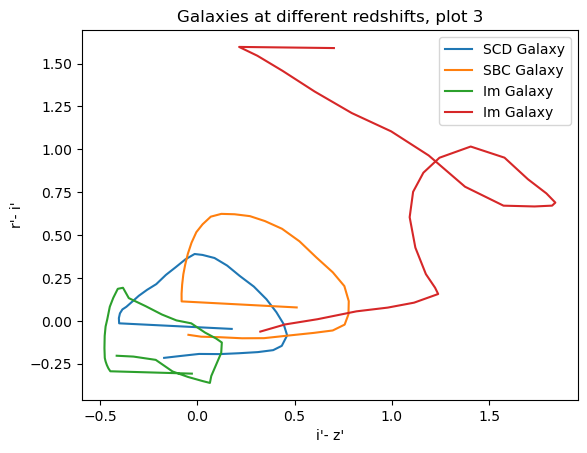

In [99]:
plt.plot(i_z1[:31], r_i1, label='SCD Galaxy')
plt.plot(i_z2[:31], r_i2, label='SBC Galaxy')
plt.plot(i_z3[:31], r_i3, label='Im Galaxy')
plt.plot(i_z4[:31], r_i4, label='Im Galaxy')
plt.xlabel("i'- z'")
plt.ylabel("r'- i'")
plt.title('Galaxies at different redshifts, plot 3')
plt.legend()